# Fingerprint Classification

At first, the three features :  Cann edge, Harris key points, and SIFT key points were extracted separately, each feature has a code in its name, and after running it, a folder was extracted containing images in the name of the feature as well, as attached in the general folder. All three features were uploaded to the Drive and used here.


***Acceess data images from drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Import all important library***

In [2]:
import numpy as np
import cv2
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate 
from prettytable import PrettyTable
import os

***Set image size and labels***

In [105]:
image_size = 128 
Labels=['1','2','3','4'] # Arch,right,left,loop
images=[]
CannyEdge = [] 
Harris = []
SIFT = [] 
AllLabels=[]

In [104]:
def cannyedge(image):
  canny = cv2.Canny(image,100,200)
  CannyEdge.append(canny) 

def harriscorner(image,gray):
  float_harris = np.float32(gray)
  dest = cv2.cornerHarris(float_harris,2, 5, 0.07)
  dest = cv2.dilate(dest, None)
  harrie=image
  harrie[dest > 0.01 * dest.max()]=[0, 0, 255]
  harrie=cv2.resize(harrie,(image_size,image_size))
  Harris.append(harrie)

def sift(image,gray):
  sift = cv2.SIFT_create()
  kp = sift.detect(gray, None)
  image_keypoint=cv2.drawKeypoints(gray ,kp ,image ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  images.append(image)
  SIFT.append(image_keypoint)

**Original image**

In [112]:
classes=[0,0,0,0]

for Label in Labels:
    folder='/content/drive/MyDrive/Colab Notebooks/Bonus/Dataset/'+ Label+'/'
    for filename in os.listdir(folder): #going through all the images in different folders and resizing them
      image_read = cv2.imread(os.path.join(folder,filename))
      img = cv2.resize(image_read,(image_size,image_size))
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      classes[int(Label)-1]+=1
      AllLabels.append(Label)

      harriscorner(image_read,cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY))
      sift(img,gray)
      cannyedge(img)

In [113]:
#convert it to np array 
SIFT=np.array(SIFT)   
CannyEdge=np.array(CannyEdge)
CannyEdge = np.stack((CannyEdge,)*3, axis=-1)   
Harris=np.array(Harris)
images=np.array(images)

In [41]:
print('class1= ', classes[0])
print('class1= ', classes[1])
print('class1= ', classes[2])
print('class1= ', classes[3])
print('Total= ', classes[0]+classes[1]+classes[2]+classes[3])

class1=  312
class1=  1008
class1=  1090
class1=  1064
Total=  3474


In [135]:
print(CannyEdge.shape)
print(Harris.shape)
print(SIFT.shape)
print(images.shape)

(3474, 128, 128, 3)
(3474, 128, 128, 3)
(3474, 128, 128, 3)
(3474, 128, 128, 3)


**Show balancing data** ; each label has same number of images

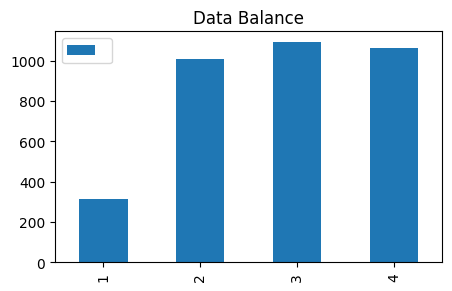

In [ ]:
col={'':classes}
models=['1','2','3','4']
df=DataFrame(data=col,index=models)
ax=df.plot(kind='bar',title='Data Balance',figsize=(5,3))

It is clear from the figure that the first class has a small number of images compared to the rest, so the data is slightly not balanced , may need to data augmentation but for now will ignore it.

***Display one image of each class***

Image of class 1 : Arch 


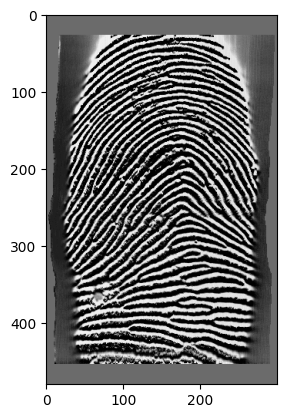

In [130]:
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Bonus/Dataset/1/ 10.png')
plt.imshow(image1)
print("Image of class 1 : Arch ") 

Image of class 2 : Right 


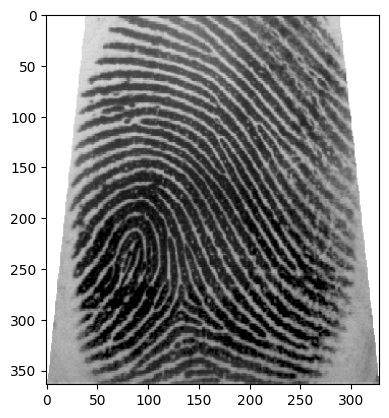

In [124]:
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Bonus/Dataset/2/ 10.png')
plt.imshow(image1)
print("Image of class 2 : Right ") 

Image of class 3 : Left 


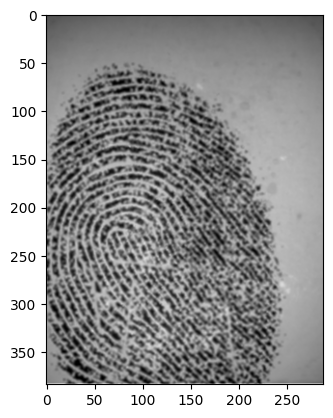

In [126]:
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Bonus/Dataset/3/ 1.png')
plt.imshow(image1)
print("Image of class 3 : Left ") 

Image of class 4 : Whorl/loop 


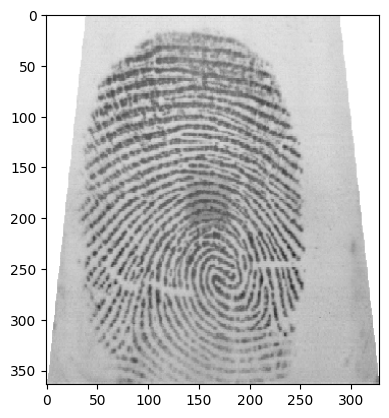

In [128]:
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Bonus/Dataset/4/ 10.png')
plt.imshow(image1)
print("Image of class 4 : Whorl/loop ") 

**Canny Edge image**
Display random of its image

Label of this image =  1


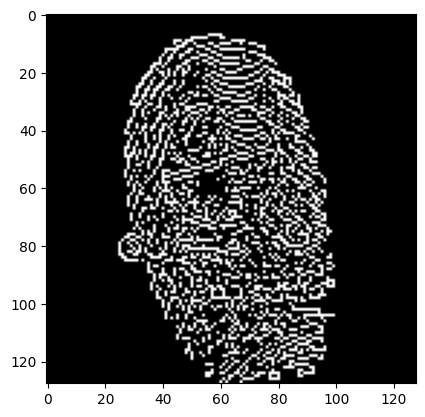

In [133]:
plt.imshow(CannyEdge[7])
print("Label of this image = ",AllLabels[7]) 

**Harris Corner image** *Display random of its image*

Label of this image =  1


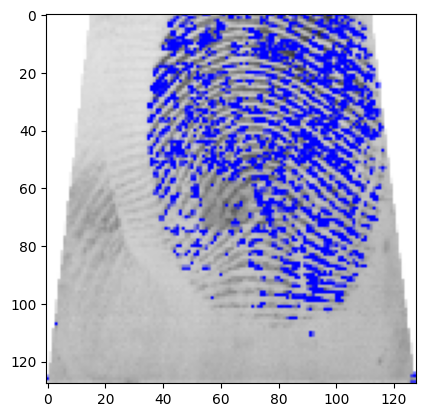

In [45]:
plt.imshow(Harris[10], cmap='gray')
print("Label of this image = ",AllLabels[10]) 

**SIFT** *Display random of its image*

Label of this image =  1


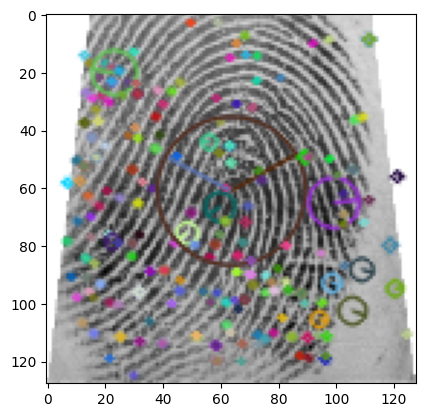

In [53]:
plt.imshow(SIFT[500], cmap='gray')
print("Label of this image = ",AllLabels[500]) 

# Classify Each feature Separately

**For Canny Edge image:**
which is popular edge detection algorithm that uses a multi-stage process to detect edges in an image.

In [79]:
X= CannyEdge
Y= AllLabels

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=40)# split training 80% and testing 20%

xtrain, xtest = xtrain / 255.0, xtest / 255.0 # normalizing to maintain the pixels of all the images within a uniform range.

nsamples, nx, ny, nrgb = xtrain.shape # resized to 2D arrays
xtrain = xtrain.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = xtest.shape # resized to 2D arrays
xtest = xtest.reshape((nsamples,nx*ny*nrgb))

model=RandomForestClassifier() 
model.fit(xtrain,ytrain)
ypred = model.predict(xtest) # predict the label beased on x testing

*Resizind 2D :* becouse we aim to use machine learning for image classification. As we will be using the ML algorithms from sklearn, there is a need to reshape the images of the dataset to a 2D array. This is because sklearn expects a 2D array as input to the fit() function which will be called on the model during training.

The splitting is **Good**

In [151]:
# Test to make sure of splitting:
xtrain=np.array(xtrain)
xtest=np.array(xtest)
print('size of image and labels : ', X.shape[0]) 
#after splitting
print('size of image training and label training : ',xtrain.shape[0]) 
print('size of image testing and label testing : ',xtest.shape[0]) 
# 3473-80% = 2779.2
# 3473-20% = 694.8 

size of image and labels :  3474
size of image training and label training :  2779
size of image testing and label testing :  695


**Results:**

In [ ]:
print('\n','Random:')
f1=f1_score(ytest, ypred,average='weighted')
precision=precision_score(ytest, ypred,average='weighted',zero_division=0)
acuuracy=accuracy_score(ytest, ypred)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')


 Random:
F1 Score: 30.44 %
Precision: 29.49 %
Accuracy: 31.94 %


***F1 score***: A measure of a test's accuracy that considers both the precision and recall of the test.

***Accuracy***: A measure of how close a predicted value is to the actual value.

***Precision***: A measure of how well a model can predict positive instances, calculated as the number of true positives divided by the sum of true positives and false positives.


**For Harris corners image:**
It's corner detection algorithm that identifies corners in an image by analyzing changes in intensity and direction of neighboring pixels.


In [ ]:
X= Harris
Y= AllLabels

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=40)# split training 80% and testing 20%

xtrain, xtest = xtrain / 255.0, xtest / 255.0 # normalizing to maintain the pixels of all the images within a uniform range.

nsamples, nx, ny, nrgb = xtrain.shape # resized to 2D arrays
xtrain = xtrain.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = xtest.shape # resized to 2D arrays
xtest = xtest.reshape((nsamples,nx*ny*nrgb))

model=RandomForestClassifier() # our model is Random Forest Classifier
model.fit(xtrain,ytrain)

ypred = model.predict(xtest) # predict the label beased on x testing

**Results:**

In [ ]:
# we already import sklearn.metrics for three metrics
print('\n','Random:')
f1=f1_score(ytest, ypred,average='weighted')
precision=precision_score(ytest, ypred,average='weighted',zero_division=0)
acuuracy=accuracy_score(ytest, ypred)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')


 Random:
F1 Score: 36.28 %
Precision: 35.22 %
Accuracy: 38.13 %


**For SIFT key points image:**
Scale-Invariant Feature Transform (SIFT) is a feature detection algorithm used to identify and describe local features in an image.

In [ ]:
X= SIFT
Y= AllLabels

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=40)# split training 80% and testing 20%

xtrain, xtest = xtrain / 255.0, xtest / 255.0 # normalizing to maintain the pixels of all the images within a uniform range.

nsamples, nx, ny, nrgb = xtrain.shape # resized to 2D arrays
xtrain = xtrain.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = xtest.shape # resized to 2D arrays
xtest = xtest.reshape((nsamples,nx*ny*nrgb))

model=RandomForestClassifier() # our model is Random Forest Classifier
model.fit(xtrain,ytrain)

ypred = model.predict(xtest) # predict the label beased on x testing

**Results:**

In [ ]:
# we already import sklearn.metrics for three metrics
print('\n','Random:')
f1=f1_score(ytest, ypred,average='weighted')
precision=precision_score(ytest, ypred,average='weighted',zero_division=0)
acuuracy=accuracy_score(ytest, ypred)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')


 Random:
F1 Score: 36.76 %
Precision: 35.32 %
Accuracy: 38.56 %


**We note that the results are similar for all types of features, rather low, Canny edge is the least accurate.
We need to merge to improve it**

The accuracy of the results on a single feature is low because a single feature may not be sufficient to capture all the relevant information needed for accurate classification. In other words, using only one feature may not provide enough information to distinguish between different classes or categories. Additionally, a single feature may be affected by noise or outliers, which can further reduce the accuracy of the classification results. Therefore, using multiple features is generally recommended to improve the accuracy of classification models. And that what we will do below 

# **ALL Three Features in one vectore**

We using data frame method to fusing features in single one.

will try three machine learning models: Random forest, Decision tree, KNeighbors 

In [ ]:
X= np.concatenate((CannyEdge,Harris,SIFT))
Y= np.concatenate((AllLabels,AllLabels,AllLabels))

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=40)# split training 80% and testing 20%

xtrain, xtest = xtrain / 255.0, xtest / 255.0 # normalizing to maintain the pixels of all the images within a uniform range.

nsamples, nx, ny, nrgb = xtrain.shape # resized to 2D arrays
xtrain = xtrain.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = xtest.shape # resized to 2D arrays
xtest = xtest.reshape((nsamples,nx*ny*nrgb))

Random=RandomForestClassifier() # Random Forest Classifier
Random.fit(xtrain,ytrain)
ypred_Random = Random.predict(xtest) #predict the label beased on x testing

Tree=DecisionTreeClassifier() # Decision Tree Classifier
Tree.fit(xtrain,ytrain)
ypred_Tree = Tree.predict(xtest) #predict the label beased on x testing

KNN=KNeighborsClassifier()  # K Neighbors Classifier
KNN.fit(xtrain,ytrain)
ypred_KNN = KNN.predict(xtest) #predict the label beased on x testing

**Results**

In [ ]:
# we already import sklearn.metrics for three metrics
print('\n','Random:')
f1=f1_score(ytest, ypred_Random,average='weighted')
precision=precision_score(ytest, ypred_Random,average='weighted')
acuuracy=accuracy_score(ytest, ypred_Random)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')

print('\n','Tree:')
f1=f1_score(ytest, ypred_Tree,average='weighted')
precision=precision_score(ytest, ypred_Tree,average='weighted')
acuuracy=accuracy_score(ytest, ypred_Tree)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')

print('\n','KNN:')
f1=f1_score(ytest, ypred_KNN,average='weighted')
precision=precision_score(ytest, ypred_KNN,average='weighted',zero_division=0)
acuuracy=accuracy_score(ytest, ypred_KNN)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')

# add average function to the merice due to the error , and choose 'weighted' 
# because micro average give me same result for all three measures, also macro average It gives very similar results.


 Random:
F1 Score: 70.53 %
Precision: 71.77 %
Accuracy: 70.50 %

 Tree:
F1 Score: 67.85 %
Precision: 67.89 %
Accuracy: 67.87 %

 KNN:
F1 Score: 39.67 %
Precision: 41.61 %
Accuracy: 40.34 %


Definitely an improvement in the model after merging the three features together.

We also note the superiority of the **Random forest** model over the rest.

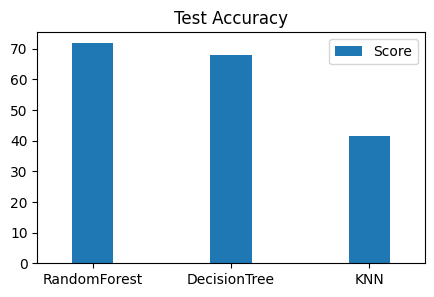

In [152]:
from pandas import DataFrame
test_acc=[71.77,67.89,41.61]
col={'Score':test_acc}
models=['RandomForest','DecisionTree','KNN']
df=DataFrame(data=col,index=models)
ax=df.plot(kind='bar',rot=0,width=0.3,title='Test Accuracy',figsize=(5,3)).get_figure()
# Comparsion between three ML models based on Percision measure 

**The Three classification models used**

***Random forest***: A ML model that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

***Decision tree***: A ML model that creates a tree-like model of decisions and their possible consequences, used for predicting outcomes.

***K neighbors***: A ML model that classifies new data points based on the majority class of its k nearest neighbors in a training dataset.

Its clear that Random forest has higher accuracy

# We try to add the **original images** to the feature vectore to increase data

In [70]:

X= np.concatenate((CannyEdge,Harris,SIFT,images))
Y= np.concatenate((AllLabels,AllLabels,AllLabels,AllLabels))

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,random_state=40)# split training 80% and testing 20%

xtrain, xtest = xtrain / 255.0, xtest / 255.0 # normalizing to maintain the pixels of all the images within a uniform range.

nsamples, nx, ny, nrgb = xtrain.shape # resized to 2D arrays
xtrain = xtrain.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = xtest.shape # resized to 2D arrays
xtest = xtest.reshape((nsamples,nx*ny*nrgb))

Random=RandomForestClassifier() # Random Forest Classifier
Random.fit(xtrain,ytrain)
ypred_Random = Random.predict(xtest) #predict the label beased on x testing

In [71]:
print('\n','Random:')
f1=f1_score(ytest, ypred_Random,average='weighted')
precision=precision_score(ytest, ypred_Random,average='weighted')
acuuracy=accuracy_score(ytest, ypred_Random)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')


 Random:
F1 Score: 77.97 %
Precision: 79.08 %
Accuracy: 78.17 %


**We notice an increase in the accuracy of the model after increasing the number of images**

# Actual Vs Predicted

The scatter plot displays the actual values along the X-axis, and displays the predicted values along the Y-axis

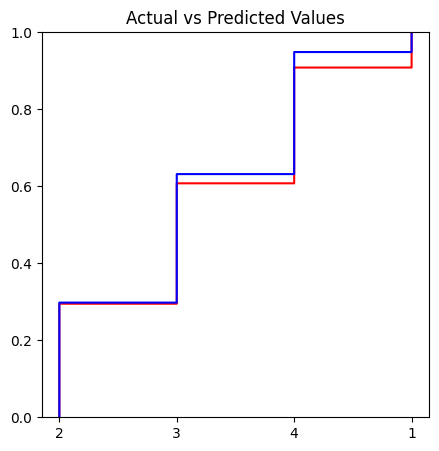

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))

ax1 = sns.ecdfplot(ytest,color="r")
sns.ecdfplot(ypred_Random, color="b", ax=ax1)

plt.title('Actual vs Predicted Values')
plt.xlabel('')
plt.ylabel('')

plt.show()
plt.close()

There is a convergence in the actual and predicted values of the label

**Conclusion**

We notice an increase in the accuracy of the model to predict the label after adding the original images of the three features, due to the increase in the number of images and the information learned on them.
The original image contains details that may not be captured by other features in the feature vector. By including the original image, the model can better differentiate between similar images and make more accurate predictions. Additionally, adding more features to the feature vector can help reduce overfitting and improve generalization of the model.



---

In the end, the *Random forest* model outperformed the rest, with the highest rate for *Precision* with **79.08 %**
We are trying to do tunning because there are several hyper parameters, which will improve its performance even more.



---

It was a wonderful experience in classifying fingerprints and knowing how to extract each feature and see it directly on the image, and noting the accuracy of classification in each feature before and after merging them together. It is true that the data set is few and we aspire to the highest, but the goal of learning and exploration has been achieved


# Tunning Process

In [153]:
Random.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# assign range to each hyperparameter
bootstrap = [True, False]
max_depth = [ 10 , 50, 100]
n_estimators = [200, 400, 600]
min_samples_leaf= [1, 4]
min_samples_split= [2, 10]

hyper_parameter_score_list=[]

for dpth in max_depth:
            RF = RandomForestClassifier(max_depth=dpth)
            # k = 3 
            scores = cross_validate(RF, xtrain, ytrain , cv=3, scoring='accuracy')
            hyper_parameter_score_list.append([dpth])


In [ ]:
myTable = PrettyTable(['n_estimators','max_depth','bootstrap','min_samples_split','min_samples_leaf', 'r2'])
for row in hyper_parameter_score_list:
    myTable.add_row([row[0], row[1],row [2],row[3],row[4],row[5]['test_score'][0]])
print(myTable)

+--------------+-----------+-----------+-------------------+------------------+--------------------+
| n_estimators | max_depth | bootstrap | min_samples_split | min_samples_leaf |         r2         |
+--------------+-----------+-----------+-------------------+------------------+--------------------+
|     200      |     10    |    True   |         2         |        1         | 0.6744186046511628 |
|     200      |     10    |    True   |         10        |        1         | 0.6976744186046512 |
|     200      |     10    |    True   |         2         |        4         | 0.686046511627907  |
|     200      |     10    |    True   |         10        |        4         | 0.686046511627907  |
|     200      |     10    |   False   |         2         |        1         | 0.7093023255813954 |
|     200      |     10    |   False   |         10        |        1         | 0.7325581395348837 |
|     200      |     10    |   False   |         2         |        4         | 0.709302325

In [ ]:
print(max(hyper_parameter_score_list))

[600, 100, True, 10, 4, {'fit_time': array([6.56817746, 6.22491789, 6.54688668]), 'score_time': array([0.09297442, 0.12720227, 0.08705449]), 'test_score': array([0.69767442, 0.52941176, 0.64705882])}]


In [ ]:
RF=RandomForestClassifier(
bootstrap= True,
max_depth= 100,
n_estimators= 600,
max_features ='auto',
min_samples_split=10,
min_samples_leaf=4
)
RF.fit(xtrain,ytrain)
ypred_RF = RF.predict(xtest)

print('\n','Random:')
f1=f1_score(ytest, ypred_RF,average='weighted')
precision=precision_score(ytest, ypred_RF,average='weighted')
acuuracy=accuracy_score(ytest, ypred_RF)
print('F1 Score: %.2f' % (f1*100) , '%')
print('Precision: %.2f' % (precision*100), '%')
print('Accuracy: %.2f' % (acuuracy*100), '%')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 Random:
F1 Score: 73.66 %
Precision: 82.61 %
Accuracy: 71.88 %


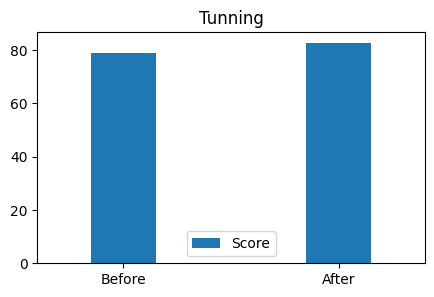

In [155]:
from pandas import DataFrame
test_acc=[79.08,82.61]
col={'Score':test_acc}
models=['Before','After']
df=DataFrame(data=col,index=models)
ax=df.plot(kind='bar',rot=0,width=0.3,title='Tunning',figsize=(5,3)).get_figure()
# Comparsion between Percision before and after tunning 

After the *Tuning process*, the accuracy of the model increased very slightly, which is a negligible improvement, because of the presence of several hyperparameters and several ranges of values that I can not try due to the **lack of resources such as GPU** and the **long time it takes to run** it.

# Future Work

In the future, we seek to complete this work by increasing the number of images, the variety of extracting features, adding data augmentation and also experimenting with the tunning process on a larger scale.